In [1]:
# pip install tensorflow==2.0.0-beta1
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense 

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
dataset = load_breast_cancer()
type(dataset)

sklearn.utils.Bunch

In [5]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
# dataset.data.shape          (569, 30)
# dataset.target.shape        (569,)

In [0]:
# dataset.target_names        array(['malignant', 'benign'], dtype='<U9')
# dataset.feature_names       array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
#                                   'mean smoothness', 'mean compactness', 'mean concavity',
#                                   'mean concave points', 'mean symmetry', 'mean fractal dimension',
#                                   'radius error', 'texture error', 'perimeter error', 'area error',
#                                   'smoothness error', 'compactness error', 'concavity error',
#                                   'concave points error', 'symmetry error',
#                                   'fractal dimension error', 'worst radius', 'worst texture',
#                                   'worst perimeter', 'worst area', 'worst smoothness',
#                                   'worst compactness', 'worst concavity', 'worst concave points',
#                                   'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.33)
N, D = X_train.shape
# X_train.shape      (381, 30)
# y_train.shape      (381,)
# X_test.shape       (188, 30)
# y_test.shape       (188,)

In [0]:
# The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
# Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the 
# whole dataset (or feature in the multivariate case)
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [0]:
model = Sequential()
model.add(Dense(1, input_dim=D, activation='sigmoid'))
# model = tf.keras.models.Sequential([
#                                     tf.keras.layers.Input(shape=(D,)),
#                                     tf.keras.layers.Dense(1, activation='sigmoid')
# ])

In [0]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [13]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 2s 6ms/sample - loss: 1.1136 - accuracy: 0.2966 - val_loss: 1.0305 - val_accuracy: 0.3564
Epoch 2/100
381/381 [==============================] - 0s 141us/sample - loss: 1.0033 - accuracy: 0.3333 - val_loss: 0.9265 - val_accuracy: 0.4255
Epoch 3/100
381/381 [==============================] - 0s 142us/sample - loss: 0.9012 - accuracy: 0.3832 - val_loss: 0.8325 - val_accuracy: 0.4681
Epoch 4/100
381/381 [==============================] - 0s 140us/sample - loss: 0.8103 - accuracy: 0.4488 - val_loss: 0.7488 - val_accuracy: 0.5319
Epoch 5/100
381/381 [==============================] - 0s 154us/sample - loss: 0.7311 - accuracy: 0.5512 - val_loss: 0.6754 - val_accuracy: 0.6223
Epoch 6/100
381/381 [==============================] - 0s 175us/sample - loss: 0.6627 - accuracy: 0.6194 - val_loss: 0.6121 - val_accuracy: 0.6915
Epoch 7/100
381/381 [==============================] - 0s 130us/sample - l

Text(0.5, 1.0, 'Training & Test Loss')

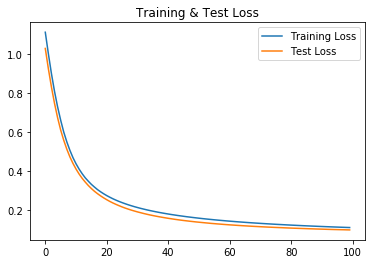

In [14]:
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Training & Test Loss')

Text(0.5, 1.0, 'Training & Test Accuracy')

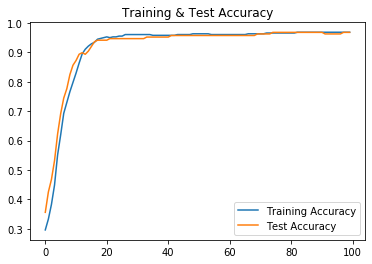

In [15]:
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Training & Test Accuracy')

**Prediction**

In [37]:
# y_test.shape          (188,)       
pred = model.predict(X_test)
print(pred)
# pred.shape            (188, 1)

[[9.0197790e-01]
 [9.9282420e-01]
 [2.4452727e-02]
 [2.3821396e-04]
 [9.7979915e-01]
 [9.3282270e-01]
 [9.9143136e-01]
 [9.1096139e-01]
 [9.9580598e-01]
 [9.9814487e-01]
 [5.5679367e-03]
 [9.5475477e-01]
 [6.7401193e-03]
 [9.9618149e-01]
 [9.4659559e-02]
 [9.7931218e-01]
 [8.9913957e-02]
 [9.9752885e-01]
 [9.6086907e-01]
 [9.7501493e-01]
 [9.7642231e-01]
 [9.9953806e-01]
 [1.8819081e-02]
 [6.8582088e-01]
 [9.9768013e-01]
 [9.9709785e-01]
 [9.6605420e-01]
 [9.8915172e-01]
 [8.7838054e-01]
 [9.5013326e-01]
 [1.3886595e-02]
 [9.3481734e-02]
 [2.7594797e-03]
 [2.4476096e-01]
 [6.3106783e-02]
 [1.8963550e-03]
 [8.3965421e-01]
 [8.8003683e-01]
 [1.4746151e-02]
 [2.3976543e-03]
 [8.1740104e-04]
 [9.9930024e-01]
 [9.9110913e-01]
 [1.2535003e-03]
 [9.7245669e-01]
 [9.7074383e-01]
 [7.4327993e-04]
 [9.8966378e-01]
 [9.7239596e-01]
 [9.7764456e-01]
 [9.9764282e-01]
 [4.9087352e-01]
 [9.9422294e-01]
 [1.6125366e-02]
 [9.9447614e-01]
 [1.6705408e-06]
 [3.5481688e-02]
 [9.9514598e-01]
 [9.6748394e-0

In [38]:
pred = np.round(pred)
print(pred)
# pred.shape        (188, 1)

[[1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.

In [41]:
pred = pred.flatten()
print(pred)
# pred.shape         (188,)

[1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0.]


In [43]:
print("Manual accuracy:", np.mean(pred == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manual accuracy: 0.9680851063829787
188/188 [==============================] - 0s 111us/sample - loss: 0.0997 - accuracy: 0.9681
Evaluate output: [0.09969296781940663, 0.9680851]


**Saving & loading model**

In [50]:
model.save('logistic.h5')

# To download to local drive
# from google.colab import files
# files.download('logistic.h5')

model = load_model('logistic.h5')
print(model.layers)
print(model.evaluate(X_test, y_test))

188/188 [==============================] - 0s 344us/sample - loss: 0.0997 - accuracy: 0.9681
[0.09969296781940663, 0.9680851]
